In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import nglview as nv
import plumed 


In [2]:
colvars_CVs = pd.read_csv('eq.colvars.traj', delimiter=r"\s+")
colvars_CVs.columns

Index(['step', 'RMSD', 'eulerTheta', 'eulerPhi', 'eulerPsi', 'polarTheta',
       'polarPhi', 'r', 'translation', 'orientation.w', 'orientation.x',
       'orientation.y', 'orientation.z'],
      dtype='object')

In [3]:
torch_CVs = np.load('./inputs/eq_qrotation.npy')
torch_CVs.shape

(1000, 4)

RMSE error orientation.w is 8.315738292359813e-08 

RMSE error orientation.x is 2.7317608712527425e-08 

RMSE error orientation.y is 1.7979528398526856e-07 

RMSE error orientation.z is 4.190878147894937e-07 



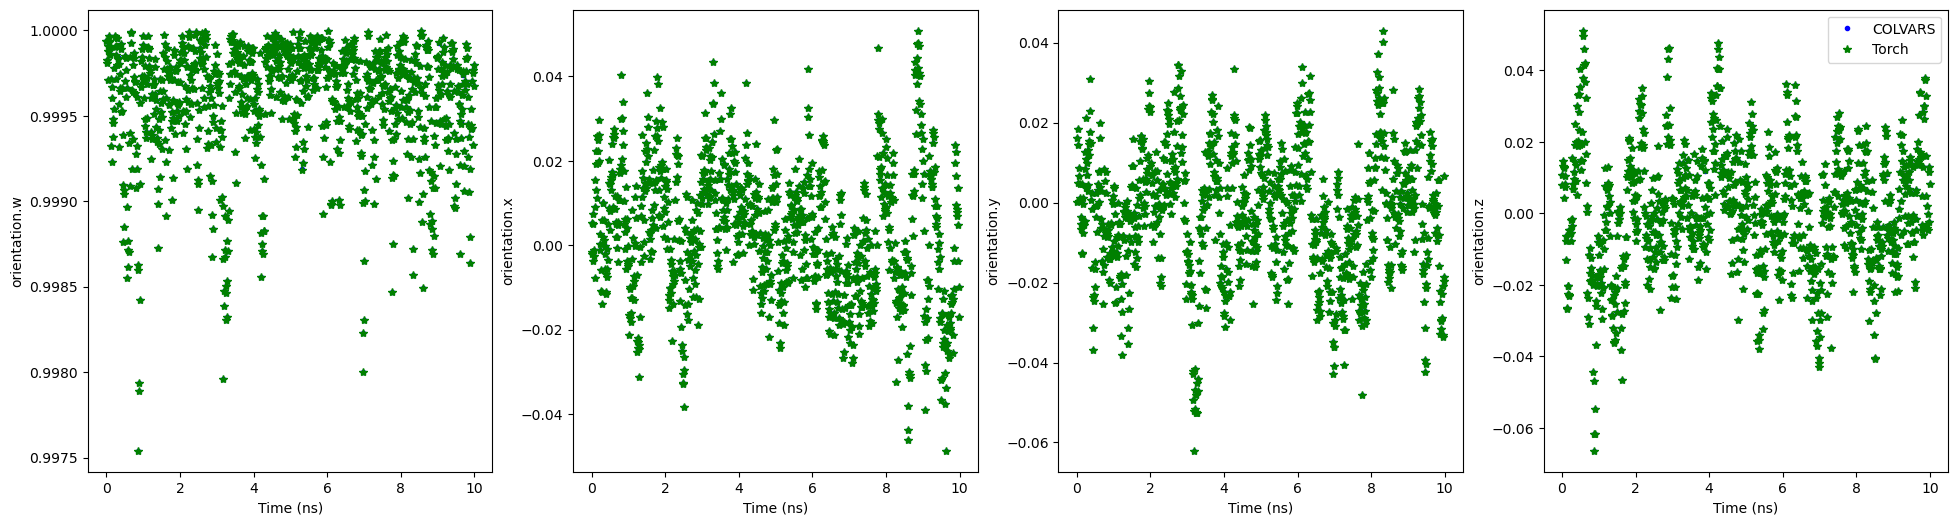

In [4]:
cv_names = ['orientation.w', 'orientation.x', 'orientation.y', 'orientation.z']
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(24, 6)
axes = axes.flatten()

time = np.arange(torch_CVs.shape[0])/100
for idx, cv_name in enumerate(cv_names):
    axes[idx].plot(time, colvars_CVs[cv_name],'b.', label='Colvars')
    axes[idx].plot(time, torch_CVs[:, idx], 'g*', label='Torch')
    diff = colvars_CVs[cv_name] - torch_CVs[:, idx]
    rmse = np.sqrt(np.mean(diff**2))
    print(f"RMSE error {cv_name} is {rmse} \n")
    axes[idx].set_xlabel('Time (ns)')
    axes[idx].set_ylabel(cv_name)
    
plt.legend(loc='best')
plt.savefig('figures/rot_q_NAMD_Torch.png')

In [11]:
traj = mdj.load_dcd('eq.dcd', 'complex.pdb')
protein_idxs = traj.top.select("protein and type!='H'")
protein_com = mdj.compute_center_of_mass(traj, select="protein and type!='H'")
lig_com = mdj.compute_center_of_mass(traj, select="resname MOL and type!='H'")
dummy_atom = np.array([0.24947330951690674,-0.06632679104804993,-0.22046539783477783])

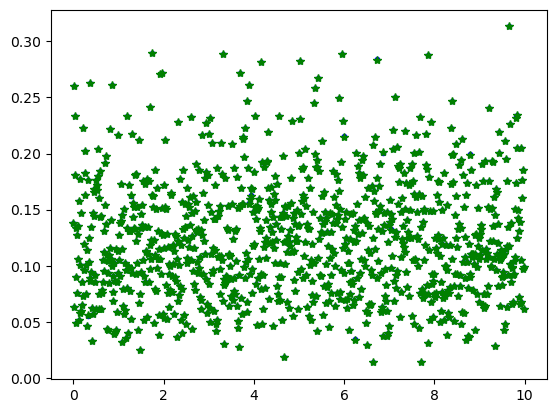

In [12]:
mdj_translation = np.linalg.norm(protein_com - dummy_atom, axis=1) * 10
plt.plot(time, colvars_CVs['translation'], 'b.', label='NAMD')
plt.plot(time, mdj_translation, 'g*', label='Mdtraj')

[ 0.255664 -0.069109 -0.212435]
[ 0.25885551 -0.06839383 -0.21055045]


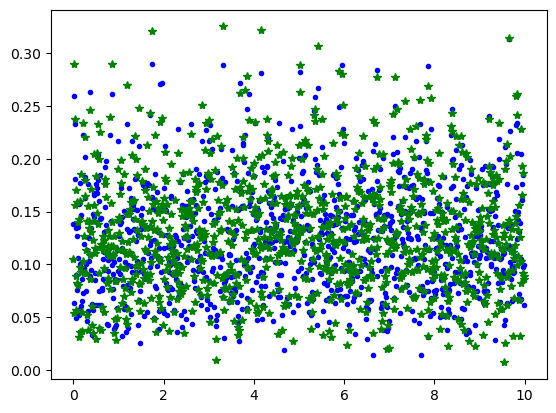

In [22]:
plumed_cogs = mdj.formats.XYZTrajectoryFile('prot_cogs.xyz').read(1000)
plumed_cogs = np.squeeze(plumed_cogs)
plumed_translation = np.linalg.norm(plumed_cogs - dummy_atom, axis=1) * 10
plt.plot(time, colvars_CVs['translation'], 'b.', label='NAMD')
plt.plot(time, plumed_translation, 'g*', label='Mdtraj')
print(plumed_cogs[0])
print(protein_com[0])


In [25]:
mdj_pos = traj.xyz[:, protein_idxs]
mdj_pos[0, 0:2]

array([[1.5663459, 1.7076095, 0.9047124],
       [1.4280845, 1.6603979, 0.869363 ]], dtype=float32)